# In this notebook, we're going to train a gender voice classifier model using logistic regression
(Make sure to run all cells before taking a look at the code)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [0]:
data = pd.read_csv('voice.csv')
# data = data.sample(frac=1).reset_index(drop=True)

In [0]:
# Encoding the label values

data['label'] = data['label'].replace(['male','female'],[1,0])

In [0]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [0]:
data = data.sample(frac=1).reset_index(drop=True)
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.179496,0.066958,0.172956,0.135788,0.239363,0.103575,1.221574,4.276509,0.945091,0.608689,0.276035,0.179496,0.138419,0.048048,0.279070,1.474276,0.023438,8.578125,8.554688,0.155321,1
1,0.200012,0.058808,0.216067,0.143733,0.258067,0.114333,1.569739,5.110164,0.886502,0.258112,0.259467,0.200012,0.128059,0.048534,0.274286,0.900240,0.023438,5.156250,5.132812,0.146902,1
2,0.201039,0.063253,0.209385,0.139122,0.262434,0.123312,2.195317,7.790039,0.880572,0.333158,0.273676,0.201039,0.139780,0.047525,0.275862,1.480619,0.023438,7.710938,7.687500,0.100537,1
3,0.189065,0.062576,0.219341,0.123986,0.237054,0.113068,2.378679,8.804143,0.904168,0.443153,0.230745,0.189065,0.100155,0.020025,0.146789,1.631168,0.210938,5.898438,5.687500,0.274725,1
4,0.180474,0.065063,0.197666,0.119497,0.239314,0.119817,2.216926,8.245348,0.917536,0.499576,0.240915,0.180474,0.133699,0.048193,0.279070,0.789742,0.023438,3.515625,3.492188,0.110067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.179467,0.058546,0.184897,0.141548,0.219842,0.078294,0.970499,3.665053,0.937305,0.479920,0.171627,0.179467,0.126011,0.046921,0.279070,0.591933,0.023438,3.750000,3.726562,0.131736,1
3164,0.105782,0.081247,0.102789,0.022764,0.188243,0.165478,27.952901,903.789086,0.893300,0.553553,0.000000,0.105782,0.087918,0.016129,0.266667,0.007812,0.007812,0.007812,0.000000,0.000000,1
3165,0.185961,0.061483,0.181907,0.149002,0.239645,0.090643,2.016796,8.353955,0.906445,0.390451,0.176319,0.185961,0.124491,0.047105,0.279070,0.812256,0.023438,5.203125,5.179688,0.095803,1
3166,0.191583,0.057748,0.203681,0.139752,0.240354,0.100602,1.101606,3.455071,0.905459,0.322392,0.229947,0.191583,0.127910,0.047105,0.272727,1.850361,0.023438,8.953125,8.929688,0.131801,1


# Splitting training(80%) and testing data(20%)

In [0]:
train_data = data.iloc[:2534]
test_data = data.iloc[2534:]

In [0]:
# Shuffling the rows

train_data = train_data.sample(frac=1).reset_index(drop=True) # 'Reset index' to avoid shuffled row indices

In [0]:
x_train = train_data.drop(['label'],axis=1)
y_train = train_data['label']

x_test = test_data.drop(['label'],axis=1)
y_test = test_data['label']

In [0]:
x_train.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
dtype: object

In [0]:
y_train.dtypes

dtype('int64')

In [0]:
y_train = y_train.astype('float64')

In [0]:
# Converting to numpy arrays

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


In [0]:
print("Shape of target : ",y_train.shape)
print("Shape of features : ",x_train.shape)

print("Shape of testing features : ",x_test.shape)
print("Shape of testing target : ",y_test.shape)

Shape of target :  (2534,)
Shape of features :  (2534, 20)


In [0]:
# Defining functions

def line(m,x,c):
  return np.dot(m,x.T)+c

def sigmoid(m,x,c):
  p = line(m,x,c)
  nr = 1
  dr = 1+np.exp(-(p))
  return nr/dr 

def cost(m,x,c,y):
  p = sigmoid(m,x,c)
  d = 0.00999
  return np.mean(-(y*np.log(p+d)+(1-y)*np.log(1-p+d)))

def grad_m(m,x,c,y):
  p = sigmoid(m,x,c)
  return np.mean((p - y).T*x,axis=0)

def grad_c(m,x,c,y):
  p = sigmoid(m,x,c)
  return np.mean(p - y)

def accuracy(m,x,c,y):
  y_pred=sigmoid(m,x,c)
  ### As y_pred in our case can be any value between 0 to 1
  ### We're equating them when y_pred >= 0.5 to '1' and y_pred < 0.5 to '0'
  y_pred[y_pred>=0.5]=1   
  y_pred[y_pred<0.5]=0
  correct=len(y_pred[y_pred==y])
  return (correct/len(y.T))*100   

# MinMax Normalizing 

# $MinMax = \frac{X - Min}{Max - Min} $

In [0]:
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
   


In [0]:
x_train_min_max = x_train.copy()
normalize_dataset(x_train_min_max,dataset_minmax(x_train_min_max))

# Setting up Gradient descent

i :  299
Error :  0.09660480046153473
Accuracy :  96.92186266771901


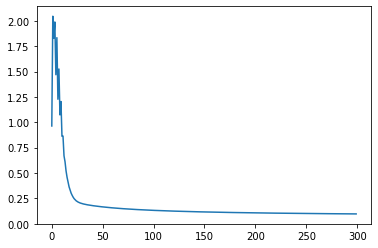

In [0]:
from IPython.display import clear_output
error = []
m = np.random.randn(1,20)
c = random.random()
lr = 6

for i in range(300):
  m = m - lr*grad_m(m,x_train_min_max,c,y_train)
  c = c - lr*grad_c(m,x_train_min_max,c,y_train)
  error.append(cost(m,x_train_min_max,c,y_train))
  clear_output(True)
  print("i : ",i)
  print("Error : ",cost(m,x_train_min_max,c,y_train))
  print("Accuracy : ",accuracy(m,x_train_min_max,c,y_train))
plt.plot(error)
plt.show()

# Testing the model

In [0]:
x_test_min_max = x_test.copy()
normalize_dataset(x_test_min_max,dataset_minmax(x_test_min_max))

In [0]:
accuracy(m,x_test_min_max,c,y_test)

97.63406940063092

# As you can see above, we have achieved an accuracy of 97% on both training and testing sets with,


1.   1000 epochs
2.   min-max normalizing the features


